## R Basic Only

a = 0.732910286169499 b = 6 c = 0.094 d = 5 color: #F4B60D 


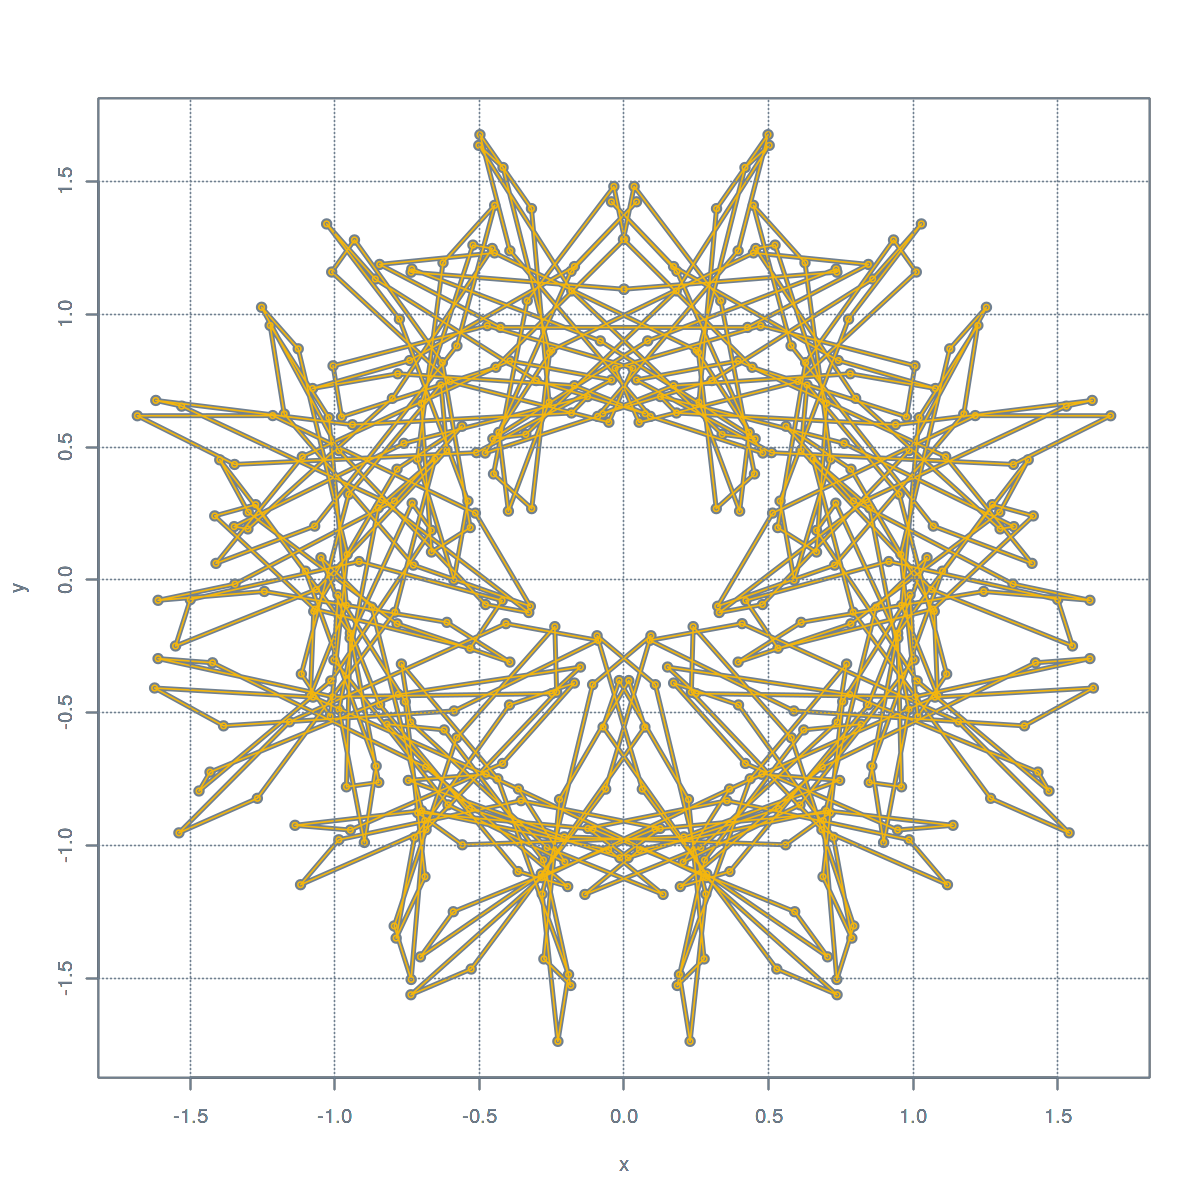

In [1]:
options(repr.plot.width=10,repr.plot.height=10)
a<-(.5+runif(1))*sample(c(-1,1),1); b<-sample(6:12,1)
c<-.001*sample(1:99,1)*sample(c(-1,1),1); d<-sample(4:8,1)
t<-seq(0,24*pi,len=24*18)
c0<-'slategray'; c1<-rgb(runif(1),runif(1),runif(1))
x<-sin(t/6)+a*sin(b*t)*cos(t)+c*sin(b*t)
y<-cos(t/6)+a*sin(b*t)*sin(t)+c*cos(d*b*t)
cat(c('a =',a,'b =',b,'c =',c,'d =',d,'color:',c1,'\n')) 
plot(x,y,type='o',cex=.6,col=c0,lwd=3); par(new=T)
plot(x,y,type='o',cex=.5,col=c1,xlab='x',ylab='y',
     fg=c0,col.axis=c0,col.lab=c0)
grid(col=c0)

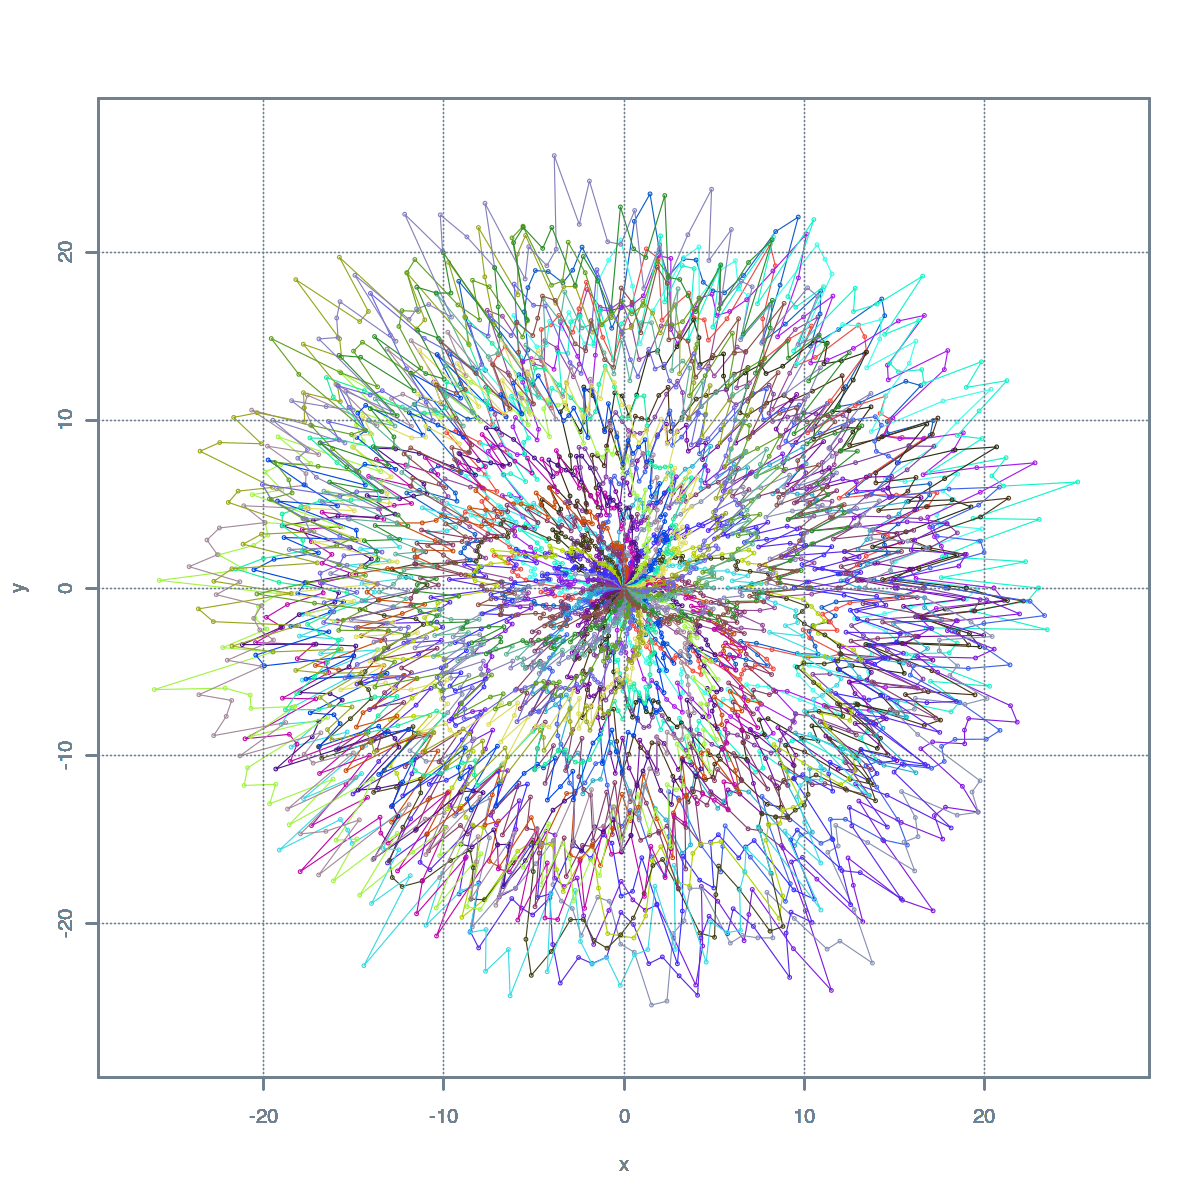

In [2]:
tmin<--pi; tmax<-pi; n<-36; t<-seq(0,2*pi,len=180)
c0<-'slategray'
for (i in 1:n) {
    f<-(sample(8:11,1)+.9*cos(sample(12:24,1)*t+
        2*pi*i/n))*(1+.1*cos(sample(25:81,1)*t+
        2*pi*i/n))*(1+.05*cos(sample(216:256,1)*t+
        2*pi*i/n))*(1+sin(t+2*pi*i/n))
    x<-f*cos(t); y<-f*sin(t)
    plot(x,y,type='o',xlim=c(-27,27),ylim=c(-27,27),
         col=rgb(runif(1),runif(1),runif(1)),
         cex=.3,lwd=.7,xlab='x',ylab='y',
         fg=c0,col.axis=c0,col.lab=c0); par(new=T)}
grid(col=c0)

## R Packages

In [3]:
library(magrittr); library(VennDiagram); library(igraph)

Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




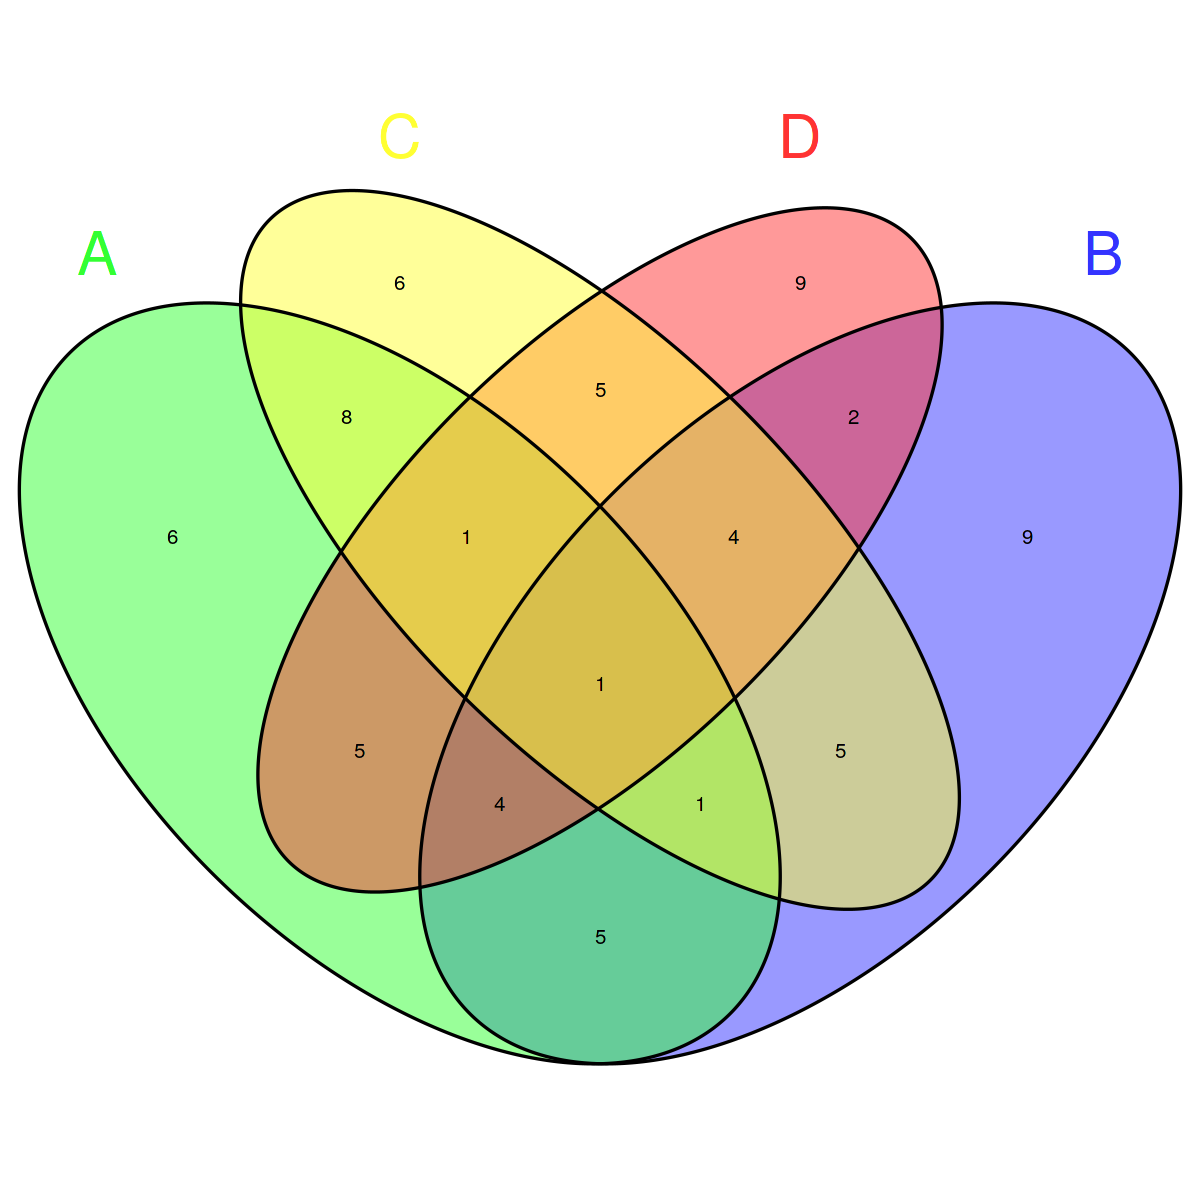

In [4]:
cols<-c('#33ff33','#3333ff','#ffff33','#ff3333')
venn.plot<-draw.quad.venn(
    area1=31,area2=31,area3=31,area4=31,
    n12=11,n13=11,n14=11,n23=11,n24=11,n34=11,
    n123=2,n124=5,n134=2,n234=5,n1234=1,
    category=c('A','B','C','D'),
    fill=cols,cat.col=cols,cat.cex=3)

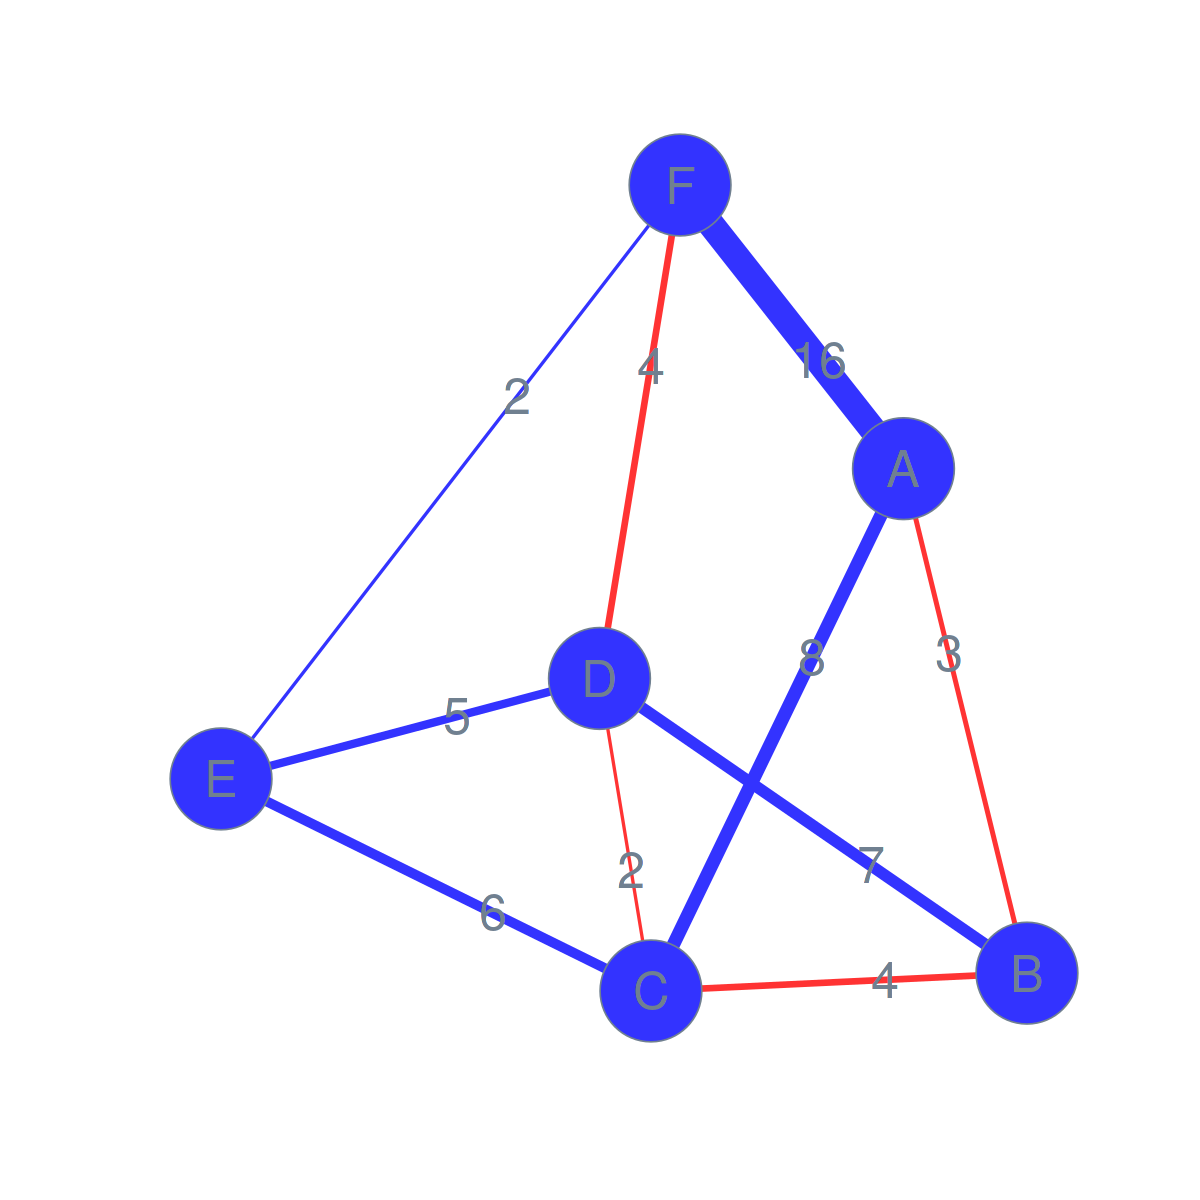

In [5]:
edges<-c('A','B', 'A','C', 'A','F', 'B','C', 'B','D',
         'C','D', 'C','E', 'D','E', 'D','F', 'E','F')
weights<-c(3,8,16,4,7,2,6,5,4,2)
g<-graph(edges,directed=FALSE)%>%
    set_edge_attr("weight",value=weights)
shortest_path<-get.shortest.paths(g,'A','F')
E(g)$color<-"#3333ff"; c0<-"slategray"
E(g,path=unlist(shortest_path$vpath))$color<-"#ff3333"
plot(g,layout=layout_nicely(g),vertex.label.cex=2.5,
     vertex.color="#3333ff",vertex.size=25,
     vertex.label.color=c0,vertex.frame.color=c0,
     edge.label.color=c0,edge.label=E(g)$weight,
     edge.label.cex=2.5,edge.width=E(g)$weight)

## Python & R

In [6]:
library(IRdisplay); library(reticulate)
library(imager)
pl<-c('matplotlib','pandas','scikit-image',
      'matplotlib_venn')
for (p in pl) {py_install(p)} 
np<-import('numpy'); pd<-import('pandas')
pl<-import('pylab'); sm<-import('skimage')
mp3d<-import('mpl_toolkits.mplot3d')
ml<-import('matplotlib.lines')
venn<-import('matplotlib_venn')


Attaching package: ‘imager’


The following object is masked from ‘package:IRdisplay’:

    display


The following object is masked from ‘package:igraph’:

    spectrum


The following object is masked from ‘package:grid’:

    depth


The following object is masked from ‘package:magrittr’:

    add


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image




Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...


Figure(900x800)

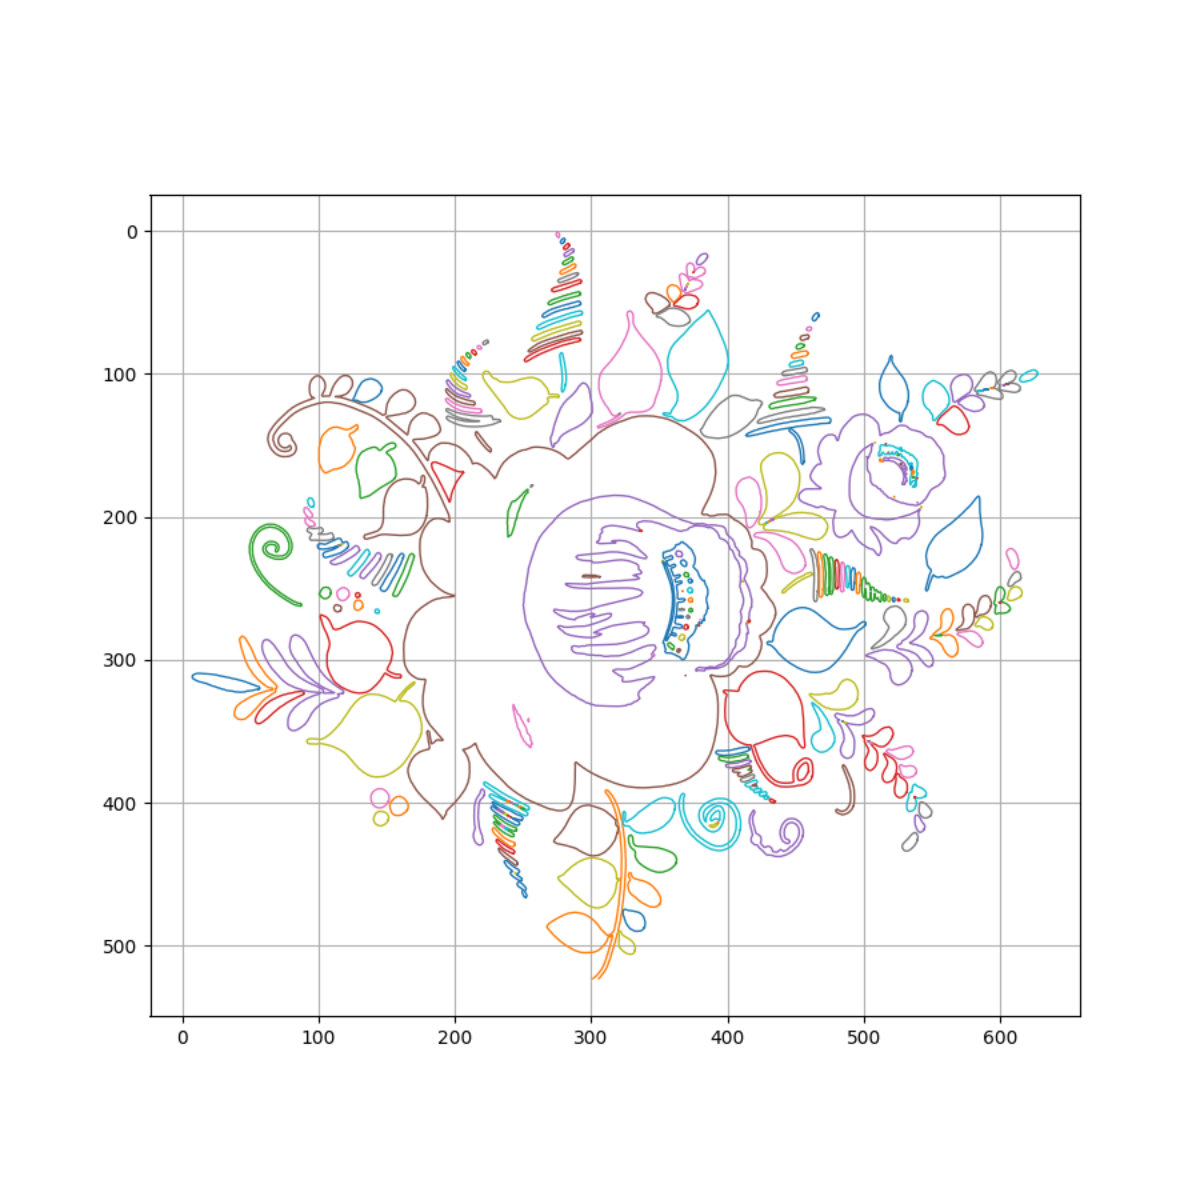

In [7]:
fpath<-'../input/image-examples-for-mixed-styles'
image_paths<-list.files(fpath,recursive=TRUE,full.names=TRUE)
example<-load.image(image_paths[4])
de<-dim(example)
example<-array_reshape(example,c(de[1],de[2],de[4]))
gray_example<-sm$color$colorconv$rgb2grey(example)
contours<-sm$measure$find_contours(gray_example,.75)
pl$figure(figsize=c(9,8)); pl$gca()$invert_yaxis()
for (i in 1:length(contours)){
    pl$plot(contours[[i]][,1],contours[[i]][,2],lw=1)}
pl$grid(); pl$savefig('rpy_plot1.png')
im<-load.image('rpy_plot1.png')
par(mar=c(0,0,0,0)); plot(im,axes=F)

Figure(700x700)

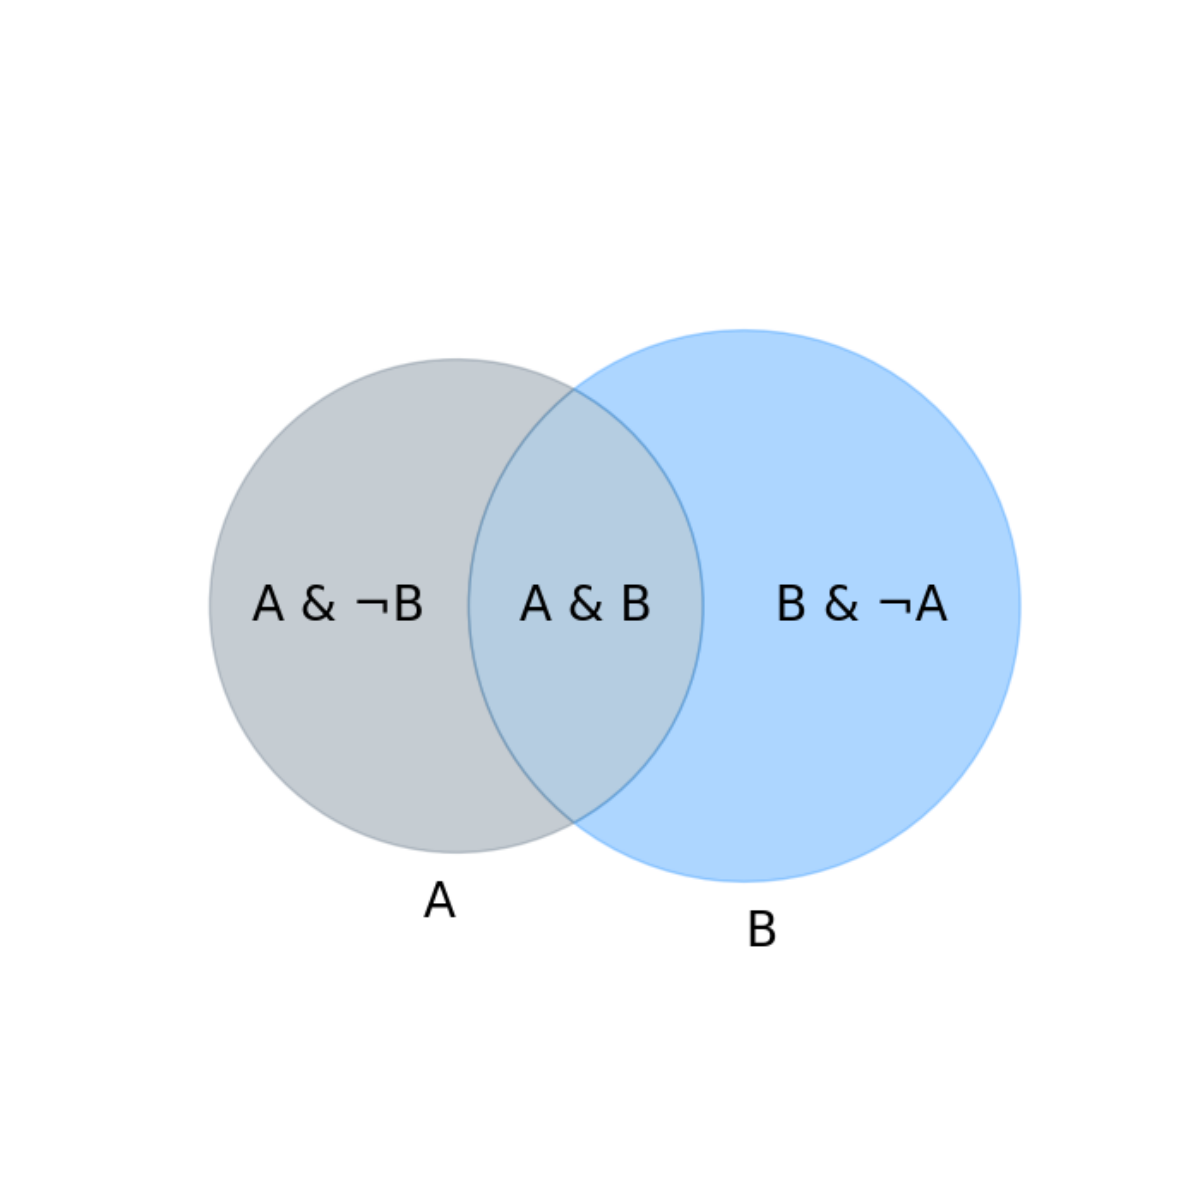

In [8]:
pl$figure(figsize=c(7,7))
v=venn$venn2(subsets=c(5,7,3),set_labels=c('A','B'))
v$get_label_by_id('10')$set_text('A & ¬B')
v$get_label_by_id('01')$set_text('B & ¬A')
v$get_label_by_id('11')$set_text('A & B')
v$get_patch_by_id('10')$set_color('slategray')
v$get_patch_by_id('01')$set_color('#3399ff')
v$get_patch_by_id('11')$set_color('steelblue')
for (text in v$set_labels){text$set_fontsize(20)}
for (text in v$subset_labels){text$set_fontsize(20)}
pl$savefig('rpy_plot1.png'); im<-load.image('rpy_plot1.png')
par(mar=c(0,0,0,0)); plot(im,axes=F)

In [9]:
X3<-Z3<-X4<-Z4<-Y5<-Z5<-seq(from=-5,to=5,by=.1)
cylinder1<-function(p,q,X,Z){
    for (x in X){for (z in Z){
        y<-q*(1-x^2/p^2)^.5; v<-c(x,y,z,x,-y,z)
        if (sum(is.na(v))==0){
            write.table(matrix(v,nrow=2,ncol=3,byrow=T),
                        file ="cylinder1.csv",append=T,
                        quote=F,col.names=F,row.names=F)}}}}
cylinder2<-function(p,q,X,Z){
    for (x in X){for (z in Z){
        y<-q*(x^2/p^2-1)^.5; v<-c(x,y,z,x,-y,z)
        if (sum(is.na(v))==0){
            write.table(matrix(v,nrow=2,ncol=3,byrow=T),
                        file="cylinder2.csv",append=T,
                        quote=F,col.names=F,row.names=F)}}}}
cylinder3<-function(p,Y,Z){
    for (y in Y){for (z in Z){
        x<-y^2/2/p; v<-c(x,y,z)
        write.table(matrix(v,nrow=1,ncol=3,byrow=T),
                    file ="cylinder3.csv",append=T,
                    quote=F,col.names=F,row.names=F)}}}
cylinder1(3,4,X3,Z3); cylinder2(2,3,X4,Z4); cylinder3(2,Y5,Z5)

Legend

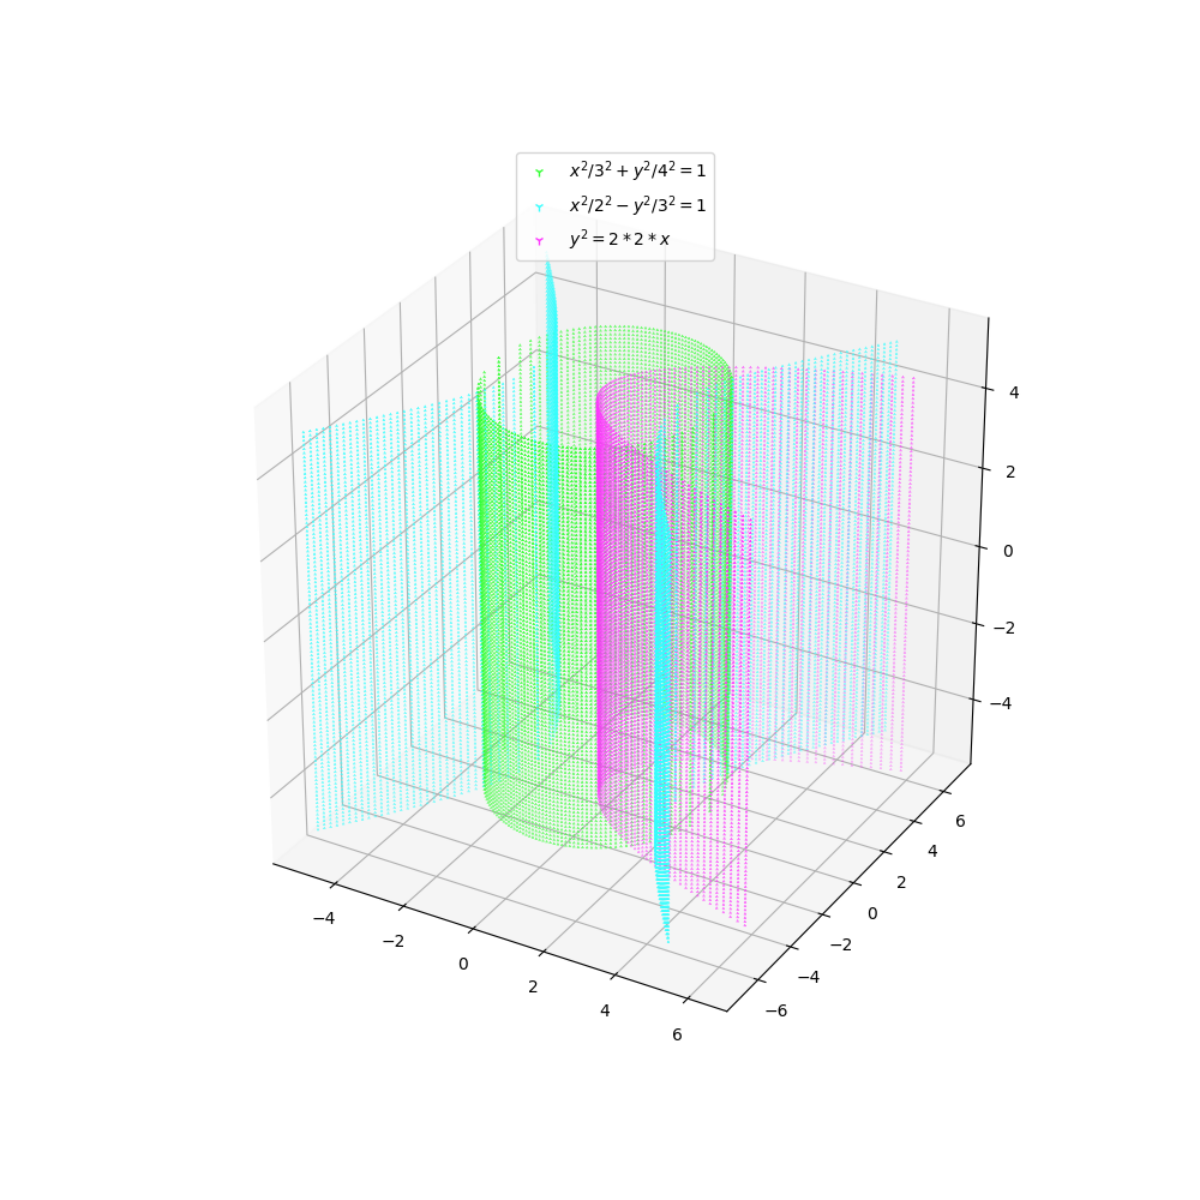

In [10]:
files<-c('cylinder1.csv','cylinder2.csv','cylinder3.csv')
colors<-c('#36ff36','#36ffff','#ff36ff')
labels<-c('$x^2/3^2+y^2/4^2=1$','$x^2/2^2-y^2/3^2=1$',
          '$y^2=2*2*x$')
XYZ<-function(i){
    np$array(np$loadtxt(files[i],delimiter=' ',unpack=TRUE))}
fig<-pl$figure(figsize=c(10,10))
ax<-fig$add_subplot(111,projection='3d')
for (i in 1:3){
    ax$scatter(XYZ(i)[1,],XYZ(i)[2,],XYZ(i)[3,],
               s=1,c=colors[i],marker='1')}
fl2D<-function(i){
    ml$Line2D(c(0,1),c(0,1),linestyle="none",
              c=colors[i],marker='1')}
ax$legend(c(fl2D(1),fl2D(2),fl2D(3)),labels,loc=9)
pl$savefig('rpy_plot1.png'); im<-load.image('rpy_plot1.png')
par(mar=c(0,0,0,0)); plot(im,axes=F)

## R & JavaScript & HTML

In [11]:
html_str<-'<script src="//d3js.org/d3.v3.min.js"></script>
<svg id="d3b02" style="background-color:#101050;"></svg><script>
var width=250,height=250,ra=3*360,
    col=["silver","darkgray","slategray","darkslategray"],
    per=["40%","60%","80%","100%"];
var svg=d3.select("#d3b02")
          .attr("width",2*width).attr("height",2*height).append("g")
          .attr("transform","translate("+width+","+height+")");
var gradient=svg.append("defs")
                .append("linearGradient").attr("id","gradient")
                .attr("x1","0%").attr("y1","50%")
                .attr("x2","50%").attr("y2","100%");
for (var i=0; i<4; i++){
    gradient.append("stop").attr("offset",per[i])
                           .attr("stop-color",col[i]);};
svg.selectAll("path").data(d3.range(ra))
   .enter().append("path").attr("stroke","#fff")
   .attr("fill","url(#gradient)").attr("fill-opacity",.8)
   .attr("d",function(){return raindrop(Math.random()*100);})
   .attr("transform",function(d){
       return "rotate("+d+")"
              +"translate("+.9*height*Math.random()+",0)"
              +"rotate(270)";});
function raindrop(size){
  var r=Math.cos(Math.PI*size)+Math.sqrt(size);
  return "M"+r+",0"+"A"+r+","+r+" 0 1,1 "+-r+",0"
         +"C"+-r+","+-r+" 0,"+-r+" 0,"+-3*r
         +"C0,"+-r+" "+r+","+-r+" "+r+",0"+"Z";};
</script>'
html_str<-paste(as.character(html_str),collapse="\n")
write.table(html_str,file='d3chart.html',
            quote=FALSE,col.names=FALSE,row.names=FALSE)
display_html("<div id='data1'><iframe src='d3chart.html' 
             height='520' width='520'></iframe></div>")

In [12]:
html_str<-"
<script src='https://code.highcharts.com/highcharts.js'></script>
<script src='https://code.highcharts.com/highcharts-3d.js'></script>
<script src='https://code.highcharts.com/modules/accessibility.js'>
</script><figure class='highcharts-figure'>
<div id='hich' style='width:500px; height:500px;'></div></figure><script>
function randi(min,max) {return Math.floor(Math.random()*(max-min+1))+min;};
var d=.005,l=5,n=3,a=randi(11,19),b=randi(24,64);
function ar(k,a,b) {return Array(1280).fill(k).map((k,t)=>
    [k*(Math.cos(d*t)+Math.sin(a*d*t)/2-Math.cos(b*d*t)/6),
     k*(Math.sin(d*t)+Math.cos(a*d*t)/2-Math.sin(b*d*t)/6),k]);};
Highcharts.setOptions({
    colors:Highcharts.getOptions().colors.map(function (color) {return {
radialGradient:{cx:.4,cy:.3,r:.2},
stops:[[0,color],
       [1,Highcharts.color(color).brighten(-0.2).get('rgb')]]};})});
var series=[];
for (var i=1; i<n+1; i++){
    series.push({name:i,colorByPoint:true,
                 accessibility:{exposeAsGroupOnly:true},
                 marker:{radius:1},data:ar(i,a,b)})};
var chart=new Highcharts.Chart({
    chart:{renderTo:'hich',margin:100,type:'scatter3d',
    animation:false,
    options3d:{enabled:true,alpha:20,beta:20,depth:250,
               viewDistance:5,fitToPlot:false,
               frame:{bottom:{size:1,color:'rgba(0,0,0,0.2)'},
                      back:{size:1,color:'rgba(0,0,0,0.25)'},
                      side:{ size:1,color:'rgba(0,0,0,0.3)'}}} },
  title:{text:'Scatter 3D with rotation in space'},
  plotOptions:{scatter:{width:l,height:l,depth:l}},
  yAxis:{min:-l,max:l,title:null},
  xAxis:{min:-l,max:l,gridLineWidth:1},
  zAxis:{min:0,max:l,showFirstLabel:false},
  legend:{enabled:false},series:series});
(function(H){function dragStart(eStart){
    eStart=chart.pointer.normalize(eStart);
    var posX=eStart.chartX,posY=eStart.chartY,
        alpha=chart.options.chart.options3d.alpha,
        beta=chart.options.chart.options3d.beta,
        sensitivity=3,handlers=[];
    function drag(e){
      e=chart.pointer.normalize(e);
      chart.update({chart:{
          options3d:{alpha:alpha+(e.chartY-posY)/sensitivity,
                     beta:beta+(posX-e.chartX)/sensitivity}}},
                    undefined,undefined,false);}
    function unbindAll(){handlers.forEach(function(unbind){
        if (unbind){unbind();}});
        handlers.length=0;}
    handlers.push(H.addEvent(document,'mousemove',drag));
    handlers.push(H.addEvent(document,'touchmove',drag));
    handlers.push(H.addEvent(document,'mouseup',unbindAll));
    handlers.push(H.addEvent(document,'touchend',unbindAll));}
  H.addEvent(chart.container,'mousedown',dragStart);
  H.addEvent(chart.container,'touchstart',dragStart);
}(Highcharts));</script>"
html_str<-paste(as.character(html_str),collapse="\n")
write.table(html_str,file='hchart.html',
            quote=FALSE,col.names=FALSE,row.names=FALSE)
display_html("<div id='data1'><iframe src='hchart.html' 
             height='560' width='560'></iframe></div>")